### Produce ggplots of the donor metadata since it's easier to use more aesthetics with ggplot

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
donor_metadata <- read.csv("01_donor_level_metadata.csv", row.names = 1)

In [3]:
donor_metadata

,age,donor_id,sex,study,technology,age_status,age_group,disease,tech_plus_study,disease_binary
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,18,Penn:Penn_F1,female,Penn,Dropseq,fetal,fetal,ND,Dropseq_Penn,N
1,18,Penn:Penn_F2,male,Penn,Dropseq,fetal,fetal,ND,Dropseq_Penn,N
2,13,ENCODE v4 (Snyder):ENCFF802AQC,male,ENCODE v4 (Snyder),Multiome-v1,fetal,fetal,ND,Multiome-v1_ENCODE v4 (Snyder),N
3,15,ENCODE v4 (Snyder):ENCFF248EWR,male,ENCODE v4 (Snyder),Multiome-v1,fetal,fetal,ND,Multiome-v1_ENCODE v4 (Snyder),N
4,16,ENCODE v4 (Snyder):ENCFF849ALE,female,ENCODE v4 (Snyder),Multiome-v1,fetal,fetal,ND,Multiome-v1_ENCODE v4 (Snyder),N
5,15,ENCODE v4 (Snyder):ENCFF775ANN,female,ENCODE v4 (Snyder),Multiome-v1,fetal,fetal,ND,Multiome-v1_ENCODE v4 (Snyder),N
6,18,ENCODE v4 (Snyder):ENCFF805YRY,female,ENCODE v4 (Snyder),Multiome-v1,fetal,fetal,ND,Multiome-v1_ENCODE v4 (Snyder),N
7,17,ENCODE v4 (Snyder):ENCFF727JRO,female,ENCODE v4 (Snyder),Multiome-v1,fetal,fetal,ND,Multiome-v1_ENCODE v4 (Snyder),N
8,12,ENCODE v4 (Snyder):ENCFF776DQR,female,ENCODE v4 (Snyder),Multiome-v1,fetal,fetal,ND,Multiome-v1_ENCODE v4 (Snyder),N


In [4]:
# reverse the order of the studies, so that it shows up alphabetically from top to bottom
donor_metadata$study <- factor(donor_metadata$study, levels = rev(sort(unique(donor_metadata$study))) )

In [5]:
plots_dir <- "../../../paper_figures/"

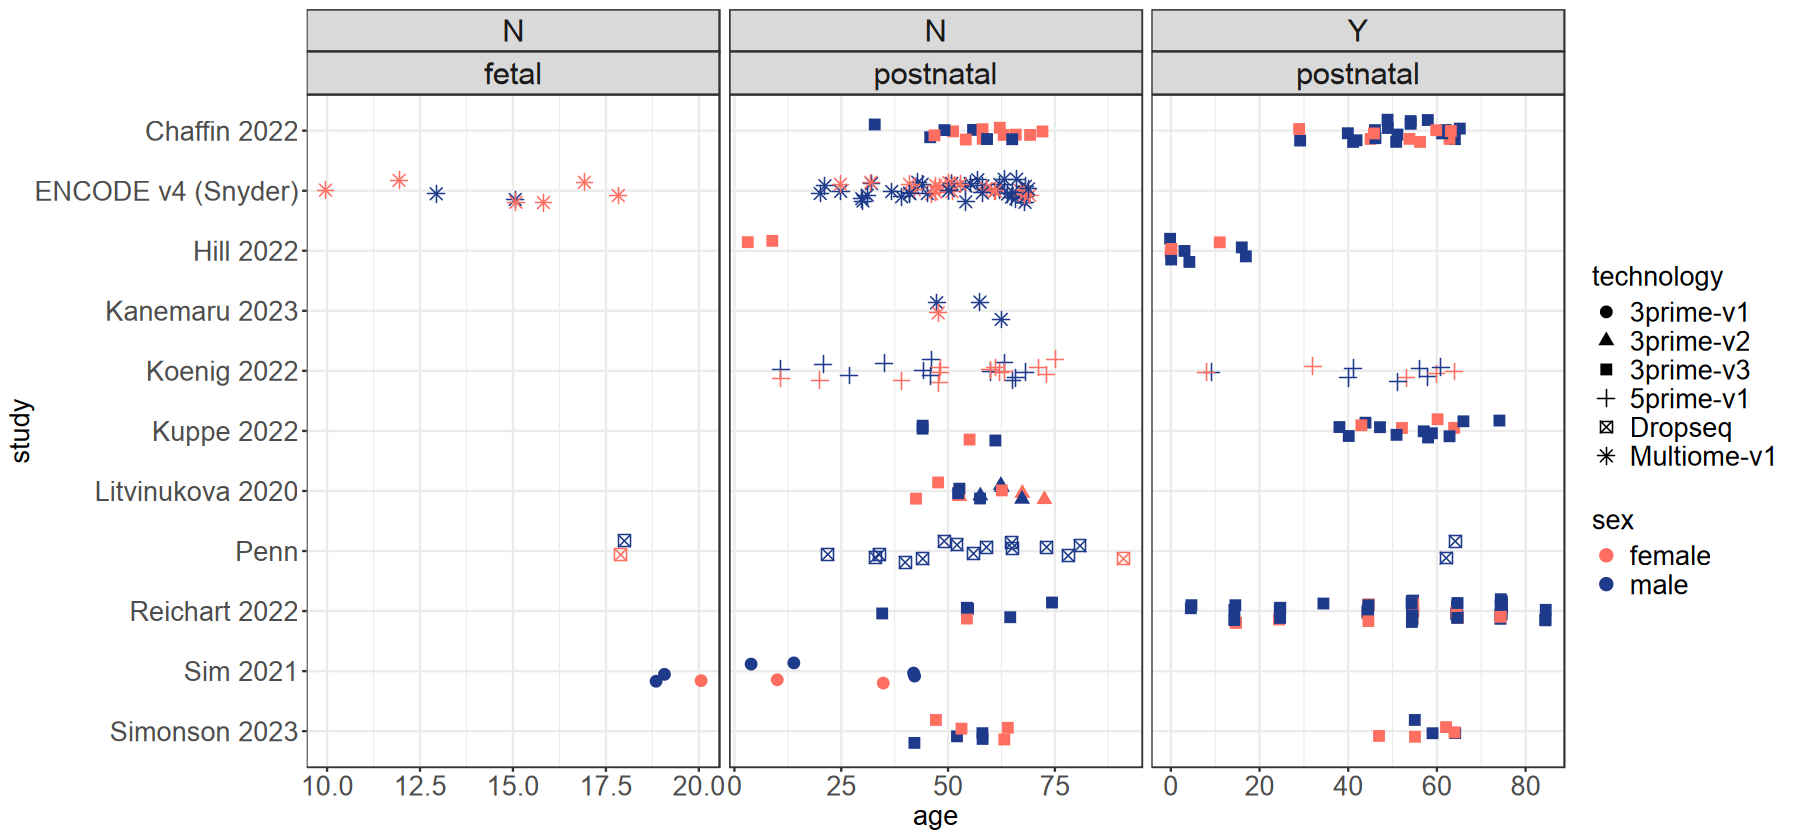

In [6]:
options(repr.plot.width = 15, repr.plot.height = 7)

color_palette <- c("male" = "#1E3A8A", "female" = "#FF6F61")

p1 <- ggplot(data = donor_metadata, mapping = aes(x = age, y = study,
                                            color = sex, shape = technology)) + geom_jitter(size = 3, height = 0.2, width = 0.2) + 
facet_wrap(~ disease_binary + age_status, scales = "free_x") + scale_color_manual(values = color_palette) +
theme_bw() + theme(legend.text = element_text(size = 16), 
         legend.title = element_text(size = 16), 
         plot.title = element_text(size = 24, hjust = 0.5), 
         axis.title.x = element_text(size = 16),
         axis.title.y = element_text(size = 16),
         axis.text.x = element_text(size = 16),
         axis.text.y = element_text(size = 16),
         strip.text = element_text(size = 18))

p1 

ggsave(p1, filename = paste0(plots_dir, "snRNA_metadata_stripplot.pdf"), width = 15, height = 7)

In [7]:
table(donor_metadata$disease)


         AMI         ARVC          DCM          HCM          ICM         NCCM 
           7            8           77           15           15            1 
          ND pediatric HF 
         167            9 

In [8]:
# reverse the order of the studies, so that it shows up alphabetically from top to bottom
donor_metadata$age_status <- factor(donor_metadata$age_status, levels = c("fetal", "postnatal"))
donor_metadata$disease <- factor(donor_metadata$disease, levels = c("ND", "AMI", "ARVC", "DCM", "HCM", "ICM",
                                                                                 "NCCM", "pediatric HF"))

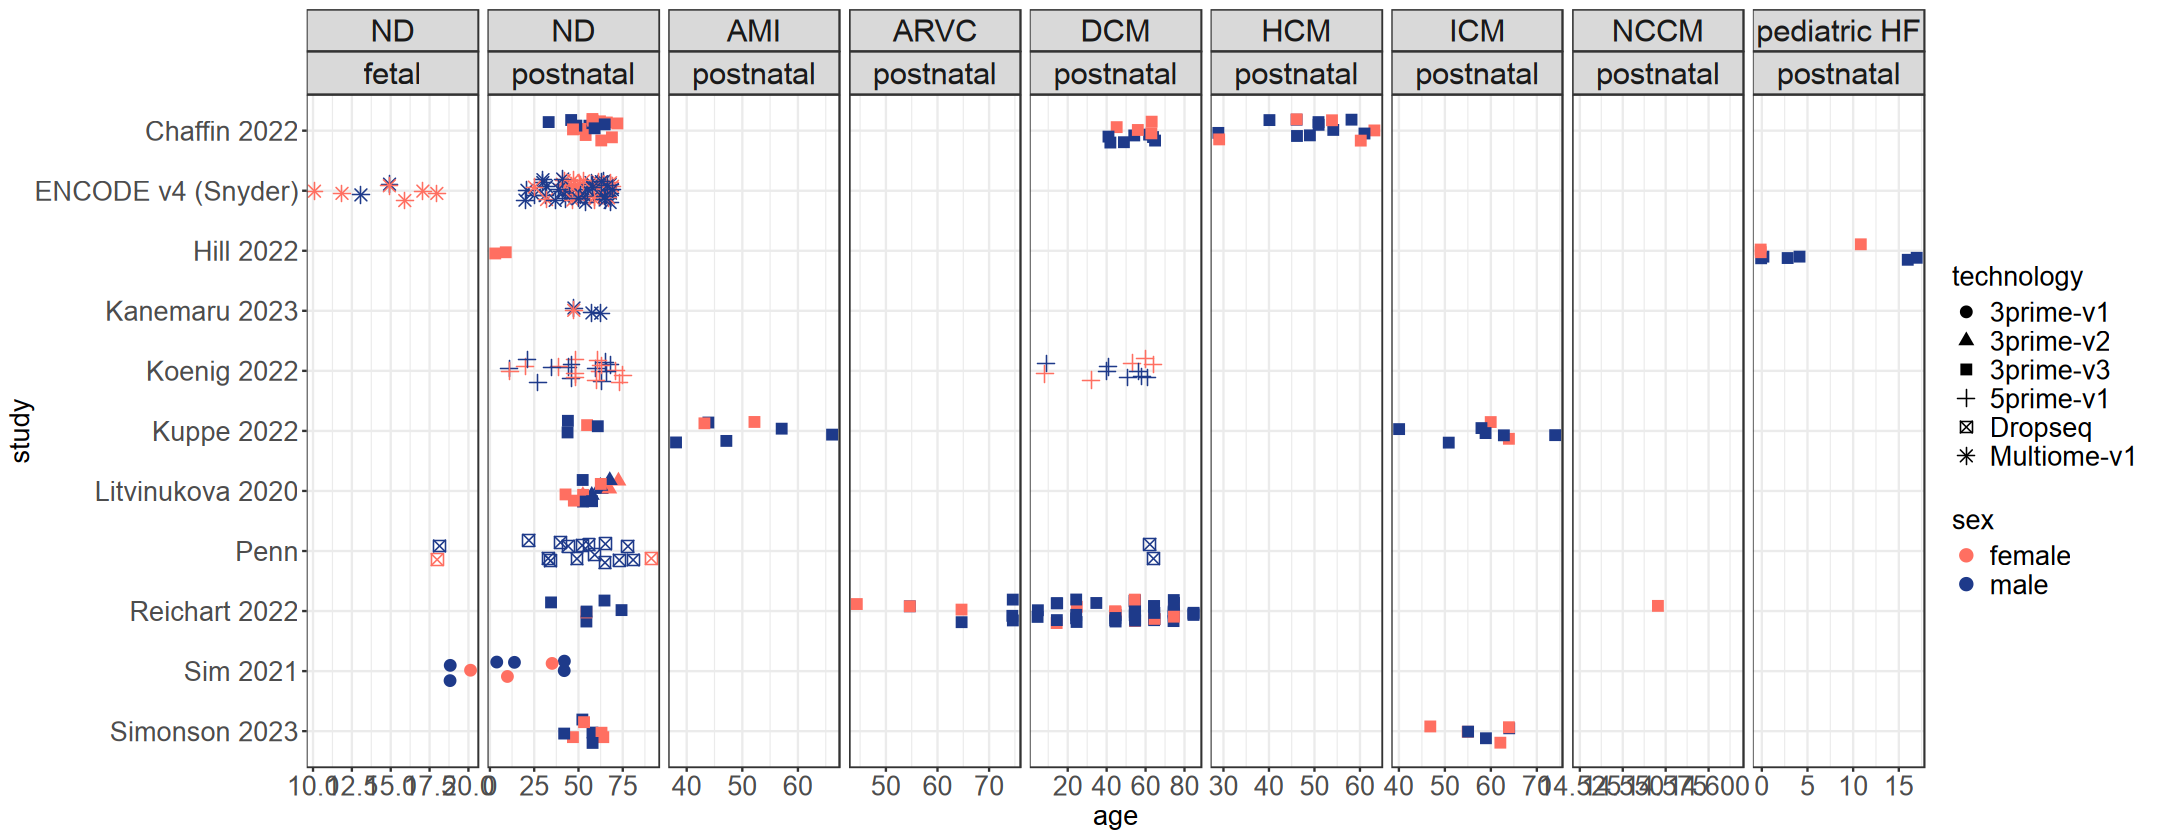

In [9]:
options(repr.plot.width = 18, repr.plot.height = 7)

p2 <- ggplot(data = donor_metadata, mapping = aes(x = age, y = study,
                                            color = sex, shape = technology)) + geom_jitter(size = 3, height = 0.2, width = 0.2) + 
facet_wrap(~ disease + age_status, scales = "free_x", nrow = 1) + scale_color_manual(values = color_palette) +
theme_bw() + theme(legend.text = element_text(size = 16), 
         legend.title = element_text(size = 16), 
         plot.title = element_text(size = 24, hjust = 0.5), 
         axis.title.x = element_text(size = 16),
         axis.title.y = element_text(size = 16),
         axis.text.x = element_text(size = 16),
         axis.text.y = element_text(size = 16),
         strip.text = element_text(size = 18))

p2

ggsave(p2, filename = paste0(plots_dir, "snRNA_metadata_stripplot_by_detailed_disease.pdf"), width = 18, height = 8)

In [10]:
table(donor_metadata$study)


     Simonson 2023           Sim 2021      Reichart 2022               Penn 
                15                  9                 67                 19 
  Litvinukova 2020         Kuppe 2022        Koenig 2022      Kanemaru 2023 
                14                 19                 37                  4 
         Hill 2022 ENCODE v4 (Snyder)       Chaffin 2022 
                11                 62                 42 

In [11]:
table(donor_metadata$age_status)


    fetal postnatal 
       13       286 

In [12]:
table(donor_metadata$age_group)


 fetal middle    old  young 
    13    128    101     57 

In [13]:
table(donor_metadata$disease_binary)


  N   Y 
167 132 

In [14]:
table(donor_metadata$disease)


          ND          AMI         ARVC          DCM          HCM          ICM 
         167            7            8           77           15           15 
        NCCM pediatric HF 
           1            9 

In [15]:
table(donor_metadata$sex)


female   male 
   111    188 

In [16]:
table(donor_metadata$technology)


  3prime-v1   3prime-v2   3prime-v3   5prime-v1     Dropseq Multiome-v1 
          9           7         161          37          19          66 

In [17]:
table(donor_metadata$study)


     Simonson 2023           Sim 2021      Reichart 2022               Penn 
                15                  9                 67                 19 
  Litvinukova 2020         Kuppe 2022        Koenig 2022      Kanemaru 2023 
                14                 19                 37                  4 
         Hill 2022 ENCODE v4 (Snyder)       Chaffin 2022 
                11                 62                 42 

### Group by study and other metadata column to create supplemental tables

In [18]:
table(donor_metadata[donor_metadata$study == "Koenig 2022", ]$disease)


          ND          AMI         ARVC          DCM          HCM          ICM 
          25            0            0           12            0            0 
        NCCM pediatric HF 
           0            0 

In [19]:
table(donor_metadata[donor_metadata$study == "Reichart 2022", ]$disease)


          ND          AMI         ARVC          DCM          HCM          ICM 
           6            0            8           52            0            0 
        NCCM pediatric HF 
           1            0 

In [20]:
donor_metadata %>% group_by(sex, study) %>% count() %>% arrange(study, desc = TRUE)

sex,study,n
<chr>,<fct>,<int>
female,Simonson 2023,8
male,Simonson 2023,7
female,Sim 2021,3
male,Sim 2021,6
female,Reichart 2022,18
male,Reichart 2022,49
female,Penn,2
male,Penn,17
female,Litvinukova 2020,7


In [21]:
donor_metadata %>% group_by(study, disease_binary, age_status) %>% count() %>% arrange(desc = TRUE)

study,disease_binary,age_status,n
<fct>,<chr>,<fct>,<int>
Simonson 2023,N,postnatal,8
Simonson 2023,Y,postnatal,7
Sim 2021,N,fetal,3
Sim 2021,N,postnatal,6
Reichart 2022,N,postnatal,6
Reichart 2022,Y,postnatal,61
Penn,N,fetal,2
Penn,N,postnatal,15
Penn,Y,postnatal,2


In [22]:
donor_metadata %>% group_by(study, age_group) %>% count() %>% arrange(desc = TRUE)

study,age_group,n
<fct>,<chr>,<int>
Simonson 2023,middle,10
Simonson 2023,old,5
Sim 2021,fetal,3
Sim 2021,middle,2
Sim 2021,young,4
Reichart 2022,middle,25
Reichart 2022,old,28
Reichart 2022,young,14
Penn,fetal,2


In [23]:
donor_metadata %>% group_by(study, disease) %>% count() %>% arrange(desc = TRUE)

study,disease,n
<fct>,<fct>,<int>
Simonson 2023,ND,8
Simonson 2023,ICM,7
Sim 2021,ND,9
Reichart 2022,ND,6
Reichart 2022,ARVC,8
Reichart 2022,DCM,52
Reichart 2022,NCCM,1
Penn,ND,17
Penn,DCM,2


### Create barplots by sex, disease
### Create age histogram

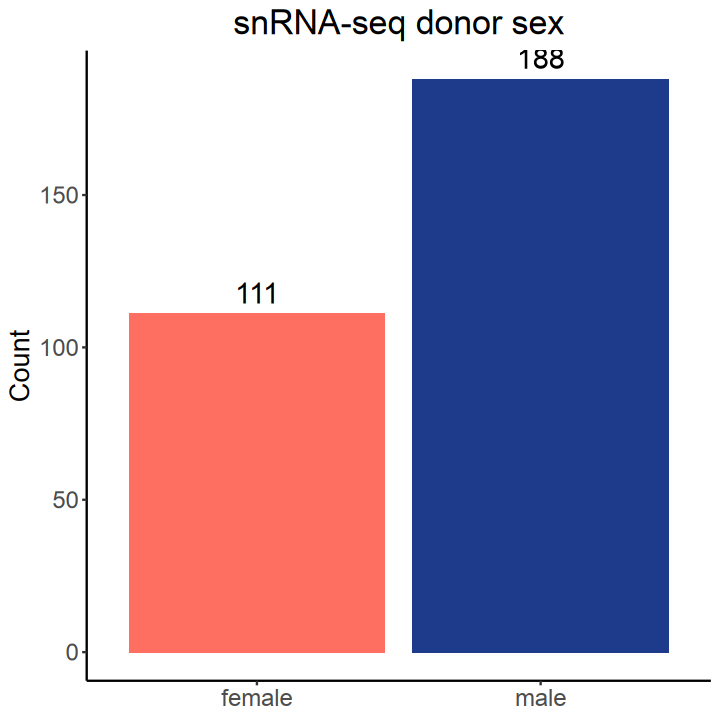

In [34]:
options(repr.plot.width = 6, repr.plot.height = 6)

sex_counts <- as.data.frame(table(donor_metadata$sex))
colnames(sex_counts) <- c("Sex", "Count") 

sex_plot <- ggplot(data = sex_counts, aes(x = Sex, y = Count, fill = Sex)) +
  geom_bar(stat = "identity") +
 geom_text(aes(label = Count), vjust = -0.5, size = 6) + 
  theme_classic() +
  labs(title = "snRNA-seq donor sex", x = "Sex", y = "Count") +
  theme(
    plot.title = element_text(size = 20, hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 16),
    legend.position = "none" 
  ) +
  scale_fill_manual(values = c("female" = "#FF6F61", "male" = "#1E3A8A"))  

ggsave(sex_plot, filename = paste0(plots_dir, "snRNA_donors_by_sex.pdf"), width = 6, height = 4)

sex_plot

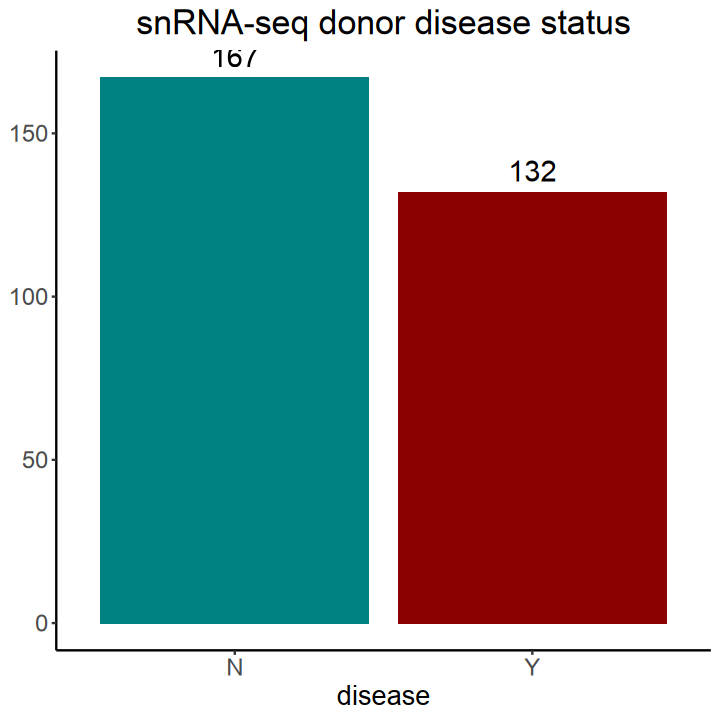

In [30]:
options(repr.plot.width = 6, repr.plot.height = 6)

disease_counts <- as.data.frame(table(donor_metadata$disease_binary))
colnames(disease_counts) <- c("disease", "count") 

disease_plot <- ggplot(data = disease_counts, aes(x = disease, y = count, fill = disease)) +
  geom_bar(stat = "identity") +
 geom_text(aes(label = count), vjust = -0.5, size = 6) + 
  theme_classic() +
  labs(title = "snRNA-seq donor disease status", x = "disease", y = "count") +
  theme(
    plot.title = element_text(size = 20, hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_blank(),
    legend.position = "none" 
  ) +
  scale_fill_manual(values = c("N" = "#008080", "Y" = "#8B0000"))  

ggsave(disease_plot, filename = paste0(plots_dir, "snRNA_donors_by_disease.pdf"), width = 6, height = 4)

disease_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


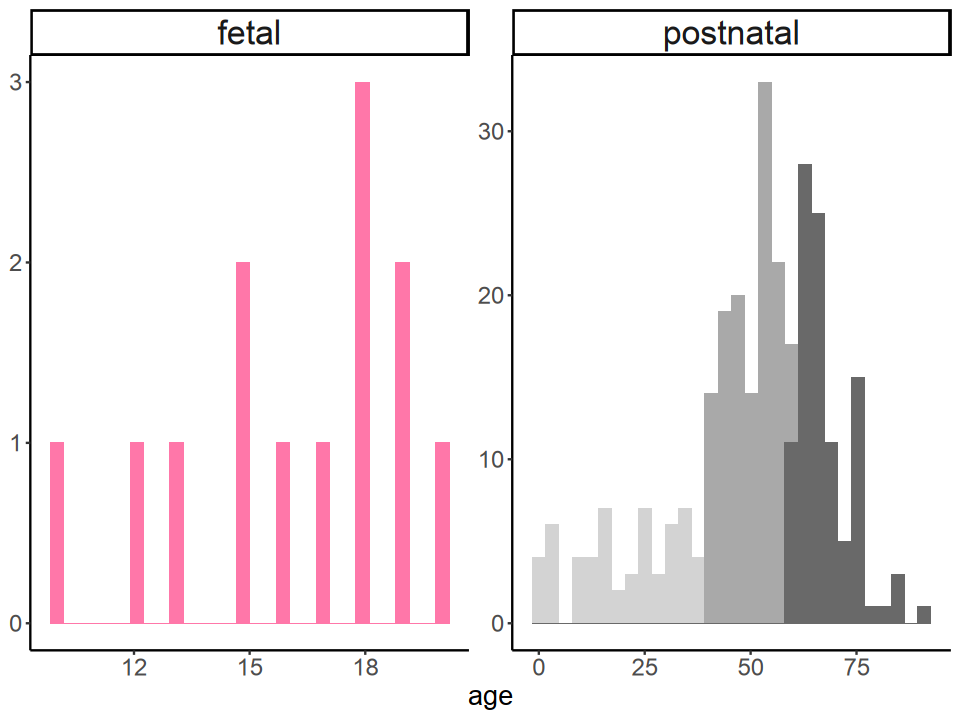

In [33]:
options(repr.plot.width = 8, repr.plot.height = 6)

donor_age_df <- donor_metadata[, c("age_status", "age", "age_group")]
donor_age_df$age_group <- factor(donor_age_df$age_group, c("fetal", "young", "middle", "old"))

age_histogram_plot <- ggplot(data = donor_age_df, mapping = aes(x = age, fill = age_group)) + geom_histogram() + facet_wrap(~age_status, scales = "free") +
scale_fill_manual(values = c("fetal" = "#FF77A9", 
                             "young" = "#D3D3D3", 
                             "middle" = "#A9A9A9", 
                             "old" = "#696969")) + 
theme_classic() + 
theme(
    plot.title = element_text(size = 20, hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_blank(),
    legend.position = "none",
    strip.text = element_text(size = 20)
  )

ggsave(age_histogram_plot, filename = paste0(plots_dir, "snRNA_donors_by_age_histogram.pdf"), width = 8, height = 4)
age_histogram_plot